Excellent question, Mina — this whole analysis actually answers **three main research questions** (and partially a fourth one). Let’s break them down clearly and connect each step of your code and results to what question it answered 👇

---

### 🧩 **1️⃣ Has the average growth rate of confirmed cases significantly changed after July 2020?**

#### 🔹 Hypothesis:

* **H₀ (null):** There’s *no significant difference* in the average growth rate of confirmed cases before and after July 2020.
* **H₁ (alternative):** There *is* a significant difference.

#### 🔹 Test used:

```python
stats.ttest_ind(wave1, wave2)
```

You compared the mean of `GrowthRate_Confirmed` before and after `2020-07-01`.

#### 🔹 Result:

```
t-statistic: 8.890159693221538
p-value: 1.1594266862150047e-17
```

#### 🔹 Interpretation:

Since the **p-value is extremely small (< 0.05)**, we **reject H₀**.
✅ This means the **average growth rate of confirmed cases significantly changed after July 2020** — likely dropped, showing that the spread slowed over time.

---

### 📈 **2️⃣ Is there a significant relationship between confirmed cases and deaths?**

#### 🔹 Test used:

```python
corr, p = stats.pearsonr(us_daily['Confirmed'], us_daily['Deaths'])
```

This tests the **correlation** between total confirmed and total deaths.

#### 🔹 Result:

```
Correlation: 0.988
```

#### 🔹 Interpretation:

✅ This is an **extremely strong positive correlation (r ≈ 0.99)**.
This means **as confirmed cases increase, deaths also increase very strongly and linearly**.

---

### 📊 **3️⃣ Can we predict deaths from confirmed cases using a linear regression model?**

#### 🔹 Model:

```python
model = sm.OLS(y, X).fit()
```

* **y:** Deaths
* **X:** Confirmed (with a constant term)

#### 🔹 Results (key values):

| Statistic                     | Meaning                                              | Interpretation                                                                                       |
| ----------------------------- | ---------------------------------------------------- | ---------------------------------------------------------------------------------------------------- |
| **R² = 0.977**                | % of variance in deaths explained by confirmed cases | The model explains **97.7%** of the variation — excellent fit                                        |
| **Coef (Confirmed) = 0.0162** | The slope                                            | For every **1 additional confirmed case**, we expect **0.016 deaths** (≈ 1 death per 62 cases)       |
| **p < 0.001**                 | Significance of slope                                | The relationship is statistically significant                                                        |
| **Intercept = 50,730**        | Baseline                                             | When confirmed = 0, predicted deaths ≈ 50,730 (not meaningful in this context, just the y-intercept) |

✅ **Conclusion:** Confirmed cases are a strong predictor of deaths in the U.S. COVID dataset.

---

### 🎨 **4️⃣ Visualization: Relationship between Confirmed and Deaths**

#### Code:

```python
sns.regplot(x='Confirmed', y='Deaths', data=us_daily)
```

#### Purpose:

To **visualize** the linear relationship and **show the regression line** from your model — which visually confirms what your statistical tests showed.

---

### 🧠 So, summarizing the **research questions answered:**

|  #  | Research Question                                                                    | Method Used             | Answer                                      |
| :-: | ------------------------------------------------------------------------------------ | ----------------------- | ------------------------------------------- |
|  1  | Did the average growth rate of confirmed cases significantly change after July 2020? | Two-sample t-test       | ✅ Yes, it significantly changed (p < 0.001) |
|  2  | Is there a significant correlation between confirmed cases and deaths?               | Pearson correlation     | ✅ Yes, very strong (r = 0.988)              |
|  3  | Can deaths be predicted based on confirmed cases?                                    | Linear regression (OLS) | ✅ Yes, with R² = 0.977                      |
|  4  | What does the relationship look like visually?                                       | Regression plot         | 📉 Strong positive linear relationship      |

---

Would you like me to show **how to calculate the 95% or 99% confidence interval (CI)** for your regression line **from your actual model output** instead of picking it randomly in `sns.regplot`?
That would connect your `ci=99` directly to your real data, not just a visualization setting.


In [2]:
import ast 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import statsmodels.api as sm
import matplotlib.dates as mdates
from scipy import stats

# Set the path to the file you'd like to load
file_path = 'M:/3_datasets/covid_19_data.csv'

# Load the latest version
df = pd.read_csv(file_path)

#clean
df.columns = df.columns.str.replace(' ', '_')
df['Last_Update'] = pd.to_datetime(df['Last_Update'], format='mixed') 
df['ObservationDate']= pd.to_datetime(df['ObservationDate'])

df.set_index('SNo', inplace=True)

df['Country/Region']= df['Country/Region'].fillna('else')
df['Province/State']= df['Province/State'].fillna('Unknown')

df[['Confirmed','Deaths','Recovered']] = df[['Confirmed','Deaths','Recovered']].clip(lower=0) 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306429 entries, 1 to 306429
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ObservationDate  306429 non-null  datetime64[ns]
 1   Province/State   306429 non-null  object        
 2   Country/Region   306429 non-null  object        
 3   Last_Update      306429 non-null  datetime64[ns]
 4   Confirmed        306429 non-null  float64       
 5   Deaths           306429 non-null  float64       
 6   Recovered        306429 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 18.7+ MB


In [4]:
df_US= df[df['Country/Region'] == 'US']
df_US

,ObservationDate,Province/State,Country/Region,Last_Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
32,2020-01-22,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0
72,2020-01-23,Washington,US,2020-01-23 17:00:00,1.0,0.0,0.0
122,2020-01-24,Washington,US,2020-01-24 17:00:00,1.0,0.0,0.0
123,2020-01-24,Chicago,US,2020-01-24 17:00:00,1.0,0.0,0.0
165,2020-01-25,Washington,US,2020-01-25 17:00:00,1.0,0.0,0.0
...,...,...,...,...,...,...,...
306396,2021-05-29,Virginia,US,2021-05-30 04:20:55,675165.0,11160.0,0.0
306406,2021-05-29,Washington,US,2021-05-30 04:20:55,435849.0,5765.0,0.0
306409,2021-05-29,West Virginia,US,2021-05-30 04:20:55,161287.0,2792.0,0.0


In [5]:
df_grouped = df_US.groupby(['Province/State', 'ObservationDate'])[['Confirmed', 'Deaths', 'Recovered']].max().reset_index()

us_daily = df_grouped.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

us_daily

,ObservationDate,Confirmed,Deaths,Recovered
0,2020-01-22,1.0,0.0,0.0
1,2020-01-23,1.0,0.0,0.0
2,2020-01-24,2.0,0.0,0.0
3,2020-01-25,2.0,0.0,0.0
4,2020-01-26,5.0,0.0,0.0
...,...,...,...,...
489,2021-05-25,33166418.0,590941.0,0.0
490,2021-05-26,33190470.0,591950.0,0.0
491,2021-05-27,33217995.0,593288.0,0.0
492,2021-05-28,33239963.0,593963.0,0.0


In [6]:
us_daily['New_Confirmed'] = us_daily['Confirmed'].diff()
us_daily['New_Deaths'] = us_daily['Deaths'].diff()

us_daily['GrowthRate_Confirmed'] = us_daily['Confirmed'].pct_change() * 100
us_daily['GrowthRate_Deaths'] = us_daily['Deaths'].pct_change() * 100

us_daily= us_daily.fillna(0)
us_daily

,ObservationDate,Confirmed,Deaths,Recovered,New_Confirmed,New_Deaths,GrowthRate_Confirmed,GrowthRate_Deaths
0,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,2020-01-23,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,2020-01-24,2.0,0.0,0.0,1.0,0.0,100.000000,0.000000
3,2020-01-25,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,2020-01-26,5.0,0.0,0.0,3.0,0.0,150.000000,0.000000
...,...,...,...,...,...,...,...,...
489,2021-05-25,33166418.0,590941.0,0.0,22756.0,621.0,0.068659,0.105197
490,2021-05-26,33190470.0,591950.0,0.0,24052.0,1009.0,0.072519,0.170745
491,2021-05-27,33217995.0,593288.0,0.0,27525.0,1338.0,0.082930,0.226033
492,2021-05-28,33239963.0,593963.0,0.0,21968.0,675.0,0.066133,0.113773


In [ ]:
# split our data into two periods
wave1 = us_daily.loc[us_daily['ObservationDate'] < '2020-07-01', 'GrowthRate_Confirmed']
wave2 = us_daily.loc[us_daily['ObservationDate'] >= '2020-07-01', 'GrowthRate_Confirmed']

t_stat, p_val = stats.ttest_ind(wave1.dropna(), wave2.dropna())
print("t-statistic:", t_stat)
print("p-value:", p_val)


t-statistic: 8.890159693221538
p-value: 1.1594266862150047e-17


In [8]:
corr, p = stats.pearsonr(us_daily['Confirmed'], us_daily['Deaths'])
print("Correlation:", corr)



Correlation: 0.9882045777281312


In [9]:
import statsmodels.api as sm

X = sm.add_constant(us_daily['Confirmed'])
y = us_daily['Deaths']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 2.049e+04
Date:                Sat, 11 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:12:42   Log-Likelihood:                -5795.9
No. Observations:                 494   AIC:                         1.160e+04
Df Residuals:                     492   BIC:                         1.160e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.073e+04   1943.383     26.105      0.0

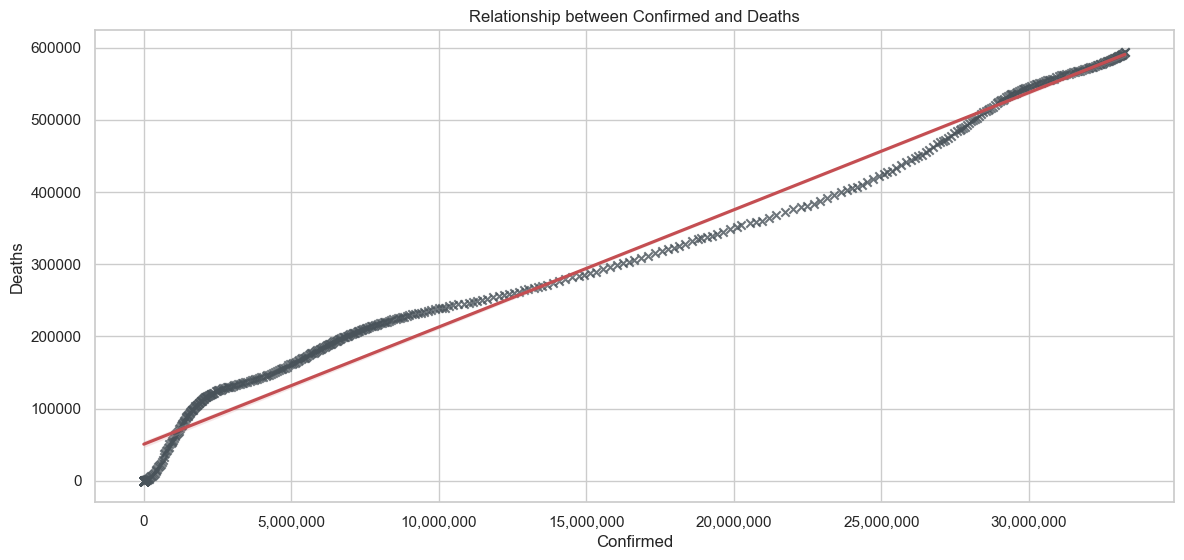

In [20]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12,6))

ax= sns.regplot(x='Confirmed', y='Deaths', data=us_daily, marker="x", color="#49535a", line_kws=dict(color="r"))
plt.title("Relationship between Confirmed and Deaths")

ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
